<a href="https://colab.research.google.com/github/georgekyrollos/CollegeTourBot/blob/main/CTB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

Functions

In [4]:
def profit(users, price, month): # randomness
  return price * users * month - monthly_server_fee*month - constant_fee # user rev - server fee - constant_fee
def avg_profit(users,price,month):
  a = ((usr_max+usr_min)/2) # avg usr growth rate
  return price * a * month**2- monthly_server_fee*month -constant_fee #avg rates instead of random
def profit_der(users,price,month): # derivative of profit function
  a = ((usr_max+usr_min)/2) # avg usr growth rate
  return 2*price*a*month -monthly_server_fee
def break_even_point():
  # price * a * m2 - sm - p
  a = price * ((usr_max+usr_min)/2)
  b = -monthly_server_fee
  c = -constant_fee
  # quadratic formula
  return round((-b+(b**2 - 4*a*c)**0.5)/(2*a))
def print_data():
  print("Break Even Time: "+str(break_even_point())+" Months")
  print("Price: $"+str(price)+" / month")
  print("Growth Rate: "+str(((usr_max+usr_min)/2))+" user(s) / month")
def function():
  #ax2 + bx + c
  a = round(price * ((usr_max+usr_min)/2),2)
  b = -monthly_server_fee
  c = -constant_fee
  return "P(m) = "+str(a)+"m\u00b2 + "+str(b)+"m + "+str(c)


Constants

In [5]:
months = np.arange(1,19) # months
constant_fee = 2000 # $
monthly_server_fee = 10 # $/month

users = np.array([0] * len(months),dtype="float64") # users size = months size
def fill_users(i):
  try:
    if i == 0:
      users[i] = 0
    else:
      users[i] = users[i-1] + random.uniform(usr_min,usr_max)
    fill_users(i+1)
  except IndexError:
    return

Analysis

In [9]:
price = 3.15 # $/month
# usr growth rate per month (usrs per month)
usr_min = -6
usr_max = 15

fill_users(0)
print(users)

[  0.          -2.22065902   6.81160532   7.35746882  11.17583929
  21.21374485  35.43939919  45.30498123  51.55471828  65.88026028
  75.78604288  73.93365772  74.17917657  86.83591789  89.44694847
  94.78401453  93.95484927 101.15049574]


Break Even Time: 12 Months
Price: $3.15 / month
Growth Rate: 4.5 user(s) / month
P(m) = 14.17m² + -10m + -2000


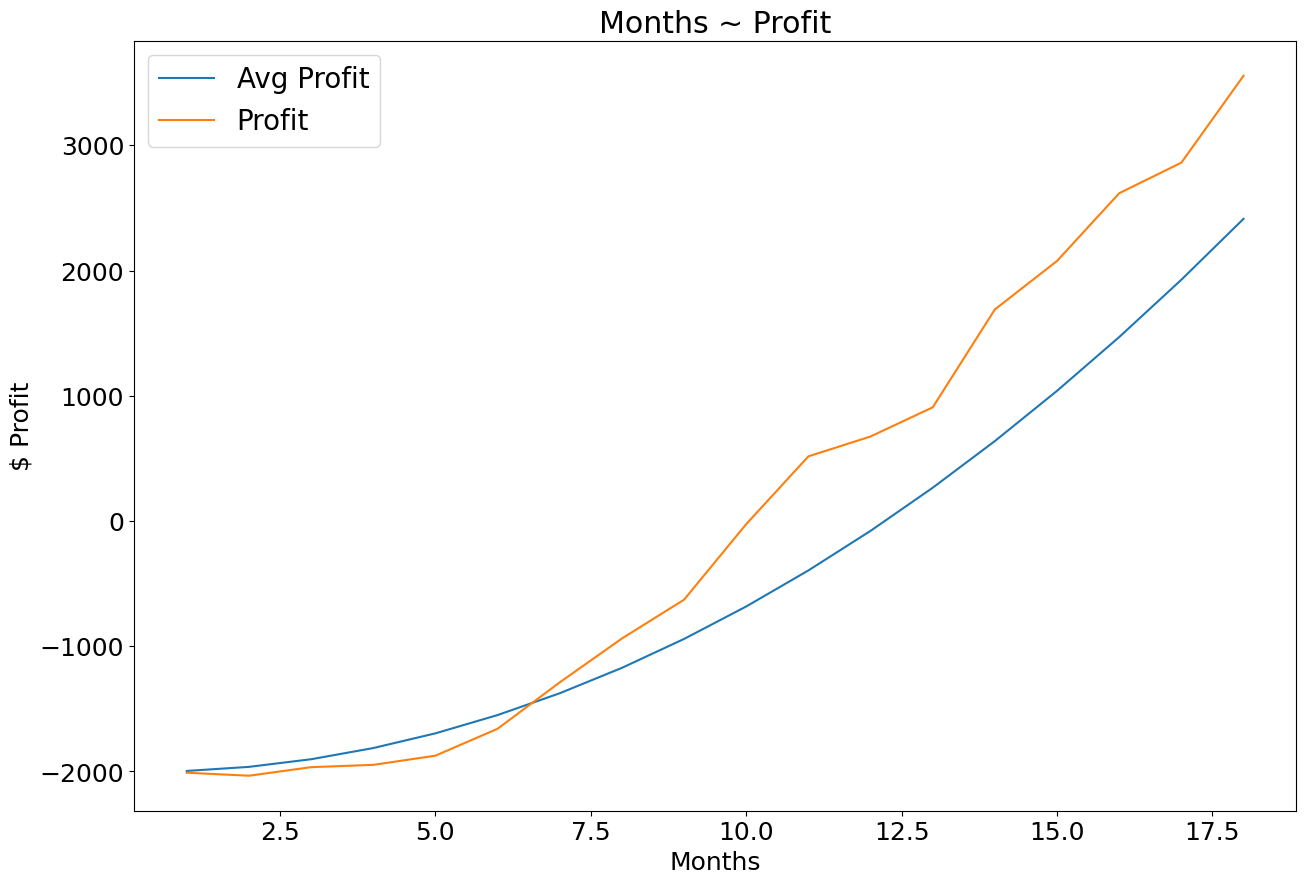

In [10]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 18})
plt.xlabel("Months")
plt.ylabel("$ Profit")
plt.title("Months ~ Profit")
plt.plot(months, avg_profit(users, price, months),label="Avg Profit")
plt.plot(months, profit(users, price, months),label="Profit")
#plt.plot(months, profit_der(users, price, months),label="Derivative")
plt.legend(loc="upper left",prop={'size': 20})

print_data()
print(function())